<a href="https://colab.research.google.com/github/Soumi7/Table_Data_Extraction/blob/main/medium_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading original image to display

In [3]:
import cv2
import matplotlib.pyplot as plt


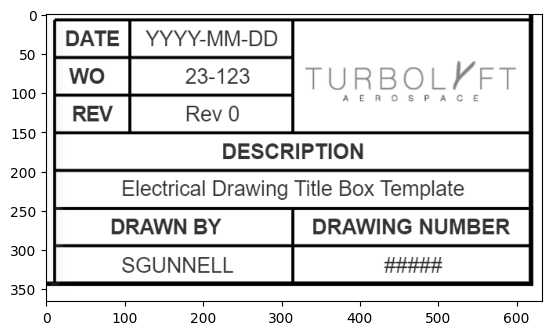

In [4]:
file=r'./images/Elec_DWG_dotless.png'
img = cv2.imread(file,0)
#img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
plot1 = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Inverted Image with global thresh holding

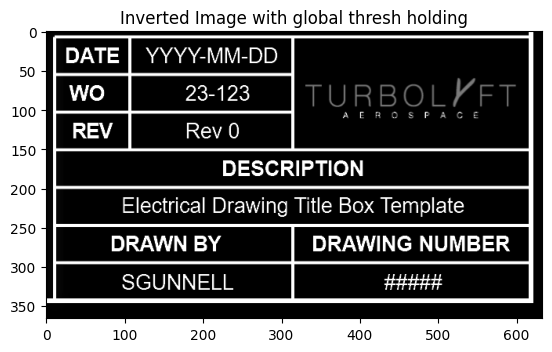

In [5]:
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_TOZERO)
img_bin = 255-img_bin
plotting = plt.imshow(img_bin,cmap='gray')
plt.title("Inverted Image with global thresh holding")
plt.show()

## Inverted Image with otsu thresh holding

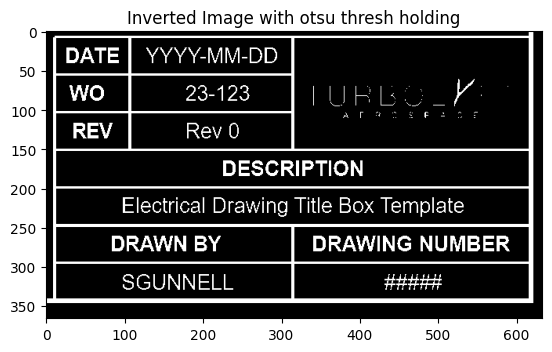

In [6]:
img_bin1 = 255-img
thresh1,img_bin1_otsu = cv2.threshold(img_bin1,128,255,cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin1_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

## Inverted image with both global and Otsu thresholding

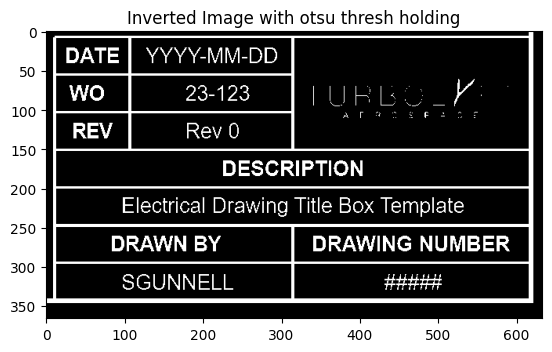

In [7]:
img_bin2 = 255-img
thresh1,img_bin_otsu = cv2.threshold(img_bin2,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

## Create a rectangular structuring element

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
print(kernel)

[[1 1]
 [1 1]]


# Morphological Operations

## Create a new structuring element to perform erosion on the image

First we need to get the vertical lines.

We create a vertical kernel with kernel width 1 and height the number of columns in image array divided by 200.

Erosion makes the pixel 1 only if all the pixels under kernel are 1.

We perform erosion for 5 iterations with the vertical kernel.

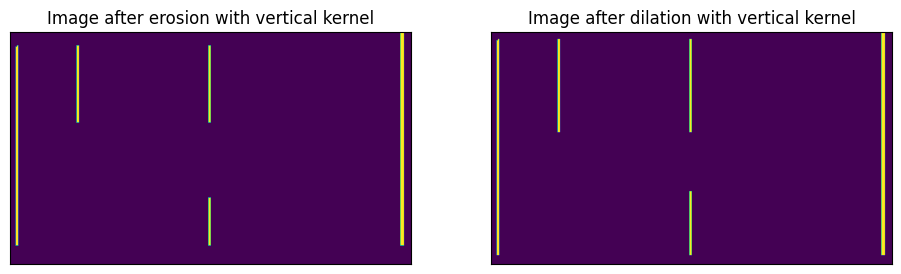

In [9]:
import numpy as np
plt.figure(figsize= (30,30))

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//100))
eroded_image = cv2.erode(img_bin_otsu, vertical_kernel, iterations=5)
plt.subplot(151),plt.imshow(eroded_image)
plt.title('Image after erosion with vertical kernel'), plt.xticks([]), plt.yticks([])

vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=5)
plt.subplot(152),plt.imshow(vertical_lines)
plt.title('Image after dilation with vertical kernel'), plt.xticks([]), plt.yticks([])

plt.show()

Dilation will make the pixel 1, if at least one of the pixels under the kernel is 1.

Similarly lets do the same with a horizontal lines to get the horizontal lines.

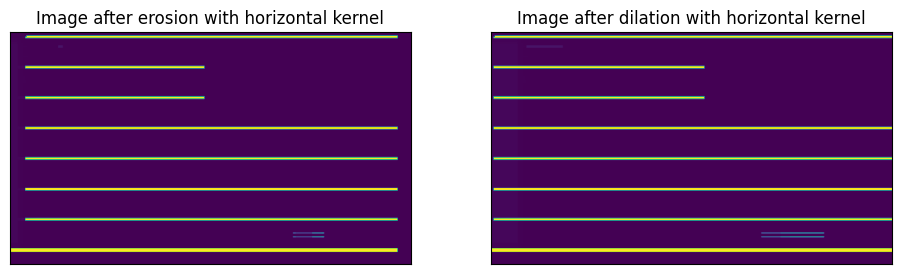

In [10]:
plt.figure(figsize= (30,30))

hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//100, 1))
horizontal_lines = cv2.erode(img_bin, hor_kernel, iterations=5)
plt.subplot(153),plt.imshow(horizontal_lines)
plt.title('Image after erosion with horizontal kernel'), plt.xticks([]), plt.yticks([])

horizontal_lines = cv2.dilate(horizontal_lines, hor_kernel, iterations=10)
plt.subplot(154),plt.imshow(horizontal_lines)
plt.title('Image after dilation with horizontal kernel'), plt.xticks([]), plt.yticks([])

plt.show()

## Now we add the two images

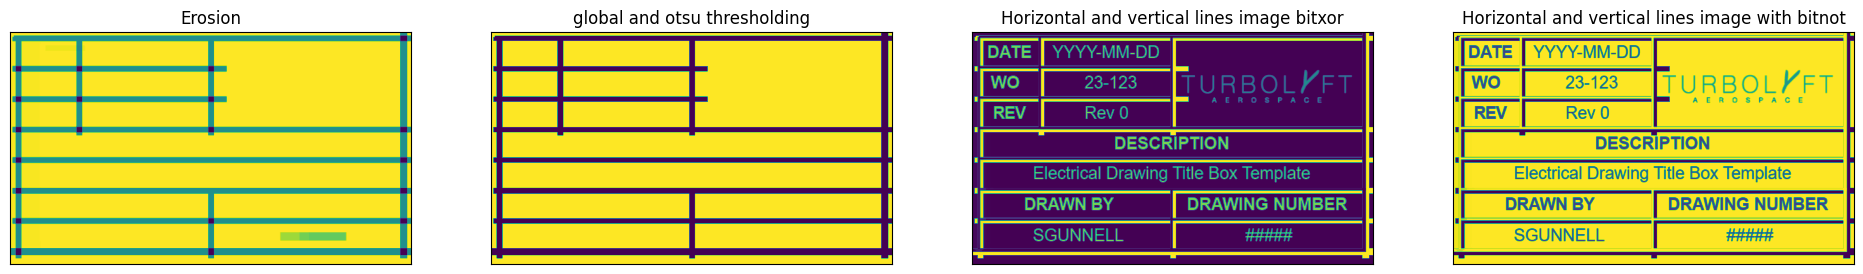

In [11]:
plt.figure(figsize= (30,30))

vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
vertical_horizontal_lines = cv2.erode(~vertical_horizontal_lines, kernel, iterations=5)
plt.subplot(151),plt.imshow(vertical_horizontal_lines)
plt.title('Erosion'), plt.xticks([]), plt.yticks([])

thresh, vertical_horizontal_lines = cv2.threshold(vertical_horizontal_lines,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.subplot(152),plt.imshow(vertical_horizontal_lines)
plt.title('global and otsu thresholding'), plt.xticks([]), plt.yticks([])

bitxor = cv2.bitwise_xor(img,vertical_horizontal_lines)
plt.subplot(153),plt.imshow(bitxor)
plt.title('Horizontal and vertical lines image bitxor'), plt.xticks([]), plt.yticks([])

bitnot = cv2.bitwise_not(bitxor)
plt.subplot(154),plt.imshow(bitnot)
plt.title('Horizontal and vertical lines image with bitnot'), plt.xticks([]), plt.yticks([])

plt.show()

In [12]:
import pytesseract

## Let's get the contours from the grid that we have obtained by adding the horizontal and vertical lines.

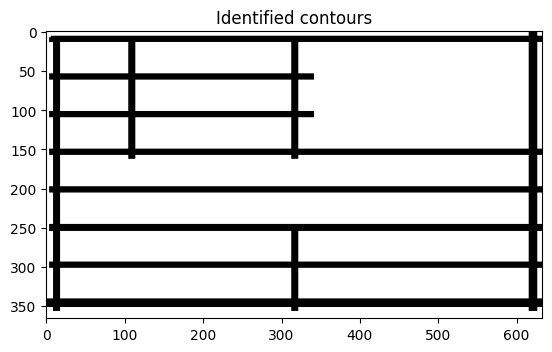

In [13]:
plotting = plt.imshow(vertical_horizontal_lines,cmap='gray')
plt.title("Identified contours")
plt.show()

In [14]:
contours, hierarchy = cv2.findContours(vertical_horizontal_lines, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [15]:
 
print("Number of Contours found = " + str(len(contours))) 
  
# Draw all contours 
# -1 signifies drawing all contours 
img1 = cv2.drawContours(img, contours, -1, (0, 255, 255), 3) 
img1 = cv2.resize(img1, (1920, 1080)) 
cv2.imshow('Contours', img1) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

Number of Contours found = 21


## Bounding Boxes

To get the coordinates of different boxes

In [16]:
boundingBoxes = [cv2.boundingRect(contour) for contour in contours]
print(boundingBoxes)
(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),key=lambda x:x[1][1]))

[(0, 352, 633, 14), (627, 302, 6, 39), (322, 302, 294, 39), (18, 302, 295, 39), (627, 255, 6, 39), (322, 255, 294, 39), (18, 255, 295, 39), (627, 206, 6, 40), (18, 206, 598, 40), (627, 158, 6, 40), (18, 158, 598, 40), (114, 110, 199, 40), (18, 110, 87, 40), (114, 62, 199, 40), (18, 62, 87, 40), (627, 14, 6, 136), (322, 14, 294, 136), (114, 14, 199, 40), (18, 14, 87, 40), (627, 0, 6, 6), (0, 0, 616, 341)]


Here we draw the contours on our image and also store them in list boxes. It is stored as a list (x,y,w,h) : x and y beind coordinates of top left corner and w and h being width and height of the box respectively.

In [17]:
img.shape

(366, 633)

(627, 0, 6, 6)
Contour area: 210056
(627, 14, 6, 136)
Contour area: 39984
Contour area: 7960
Contour area: 3480
Contour area: 7960
Contour area: 3480
Contour area: 7960
Contour area: 3480
(627, 158, 6, 40)
Contour area: 23920
(627, 206, 6, 40)
Contour area: 23920
(627, 255, 6, 39)
Contour area: 11466
Contour area: 11505
(627, 302, 6, 39)
Contour area: 11466
Contour area: 11505
(0, 352, 633, 14)


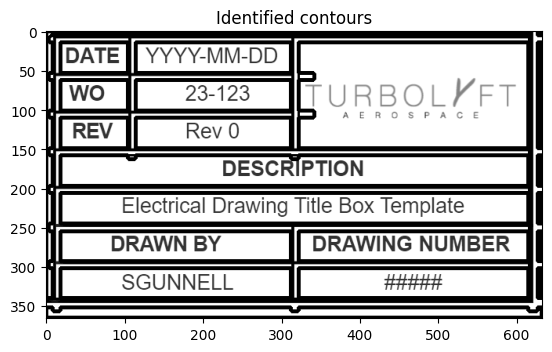

[[18, 14, 87, 40, 3480], [18, 62, 87, 40, 3480], [18, 110, 87, 40, 3480], [114, 14, 199, 40, 7960], [114, 62, 199, 40, 7960], [114, 110, 199, 40, 7960], [322, 255, 294, 39, 11466], [322, 302, 294, 39, 11466], [18, 255, 295, 39, 11505], [18, 302, 295, 39, 11505], [18, 158, 598, 40, 23920], [18, 206, 598, 40, 23920], [322, 14, 294, 136, 39984], [0, 0, 616, 341, 210056]]


In [18]:
boxes = []
height, width = img.shape
for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  if ((x+w<width or y+h<height) and w*h>3200):
      
      contour_image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
      boxes.append([x,y,w,h,w*h])
      print("Contour area:",w*h)
  else:
      print(cv2.boundingRect(contour))
plotting = plt.imshow(contour_image,cmap='gray')
plt.title("Identified contours")
plt.show()
results = sorted(boxes,key=lambda x:x[2]*x[3])
print(results)

In [19]:
sorted_boxes = sorted(boxes,key=lambda x:x[2]*x[3])
#sorted_boxes = sorted(sorted_boxes, key=lambda x: x[1])
print(sorted_boxes)
print(len(sorted_boxes))

Group1H = sorted_boxes[:3] # get the Headers for Group1 (Date, W.O., REV)
sorted_G1H = sorted(Group1H, key=lambda x: x[0])
print(sorted_G1H)

Group1C = sorted_boxes[3:6] # get the content for Group 1 (Date, W.O., REV)
sorted_G1C = sorted(Group1C, key=lambda x: x[0])
print(sorted_G1C)

dwg_num = sorted_boxes[6:8] # get the headers and content for DWG Number
sorted_DWGN = sorted(dwg_num, key=lambda x: x[1])
print(sorted_DWGN)

author = sorted_boxes[8:10] # get the headers and content for Drawn By
sorted_author = sorted(author, key=lambda x: x[1])
print(sorted_author)

description = sorted_boxes[10:12] # get the headers and content for description
sorted_desc = sorted(description, key=lambda x: x[1])
print(sorted_desc)

logo = sorted_boxes[12:13]
#logo = sorted(logo, key=lambda x: x[0])
print(logo)


table_cells = [sorted_G1H, sorted_G1C, sorted_DWGN, sorted_author, sorted_desc, logo]
#print(table_cells)

[[18, 14, 87, 40, 3480], [18, 62, 87, 40, 3480], [18, 110, 87, 40, 3480], [114, 14, 199, 40, 7960], [114, 62, 199, 40, 7960], [114, 110, 199, 40, 7960], [322, 255, 294, 39, 11466], [322, 302, 294, 39, 11466], [18, 255, 295, 39, 11505], [18, 302, 295, 39, 11505], [18, 158, 598, 40, 23920], [18, 206, 598, 40, 23920], [322, 14, 294, 136, 39984], [0, 0, 616, 341, 210056]]
14
[[18, 14, 87, 40, 3480], [18, 62, 87, 40, 3480], [18, 110, 87, 40, 3480]]
[[114, 14, 199, 40, 7960], [114, 62, 199, 40, 7960], [114, 110, 199, 40, 7960]]
[[322, 255, 294, 39, 11466], [322, 302, 294, 39, 11466]]
[[18, 255, 295, 39, 11505], [18, 302, 295, 39, 11505]]
[[18, 158, 598, 40, 23920], [18, 206, 598, 40, 23920]]
[[322, 14, 294, 136, 39984]]


## Extract image from the boxes and get the contents using pytesseract

- We extract the region of interest from the image.
- For the cell we resize it, then perform morphological operations on the extracted cell area to remove noise.
- Finally, we use pytesseract to convert the image to a string.
- We append the strings in each row first to temporary string s with spaces, and then we append this temporary string to the final dataframe.

In [22]:
dataframe_final=[]
for i,row in enumerate(results):
    #print(i,row)
    #for j, col in enumerate(row):
    s=''
    #print(j,col)
    y,x,w,h,area = row
    #print(y,x,w,h)
    roi = bitnot[x:x+h, y:y+w]
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
    border = cv2.copyMakeBorder(roi,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
    resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    dilation = cv2.dilate(resizing, kernel,iterations=1)
    erosion = cv2.erode(dilation, kernel,iterations=2)                
    out = pytesseract.image_to_string(erosion)
    if(len(out)==0):
      out = pytesseract.image_to_string(erosion)
    s = s +" "+ out
    dataframe_final.append(s)
print(dataframe_final)

[' DATE\n', ' ', ' REV\n', ' YYYY-MM-DD\n\n', ' 23-123\n\n', ' Rev 0\n\n', ' DRAWING NUMBER\n', ' HHH\n', ' DRAWN BY\n\n', ' SGUNNELL\n', ' DESCRIPTION\n\n', ' Electrical Drawing Title Box Template\n', ' OSPA\n\nBOL/YFT\n\nru\n\nU\n\nie |\n\n', ' ‘pate [ Yvvy-mm-DD\n[wo [2123 TTURBOLY FI\n[Rev [Revo sees\n\n| DESCRIPTION\n\n| Electrical Drawing Title Box Template\nT__DRAWN BY [ DRAWING NUMBER\n\nSGUNNELL | HHH\n']


In [20]:
dataframe_final=[]
for i,row in enumerate(table_cells):
    #print(i,row)
    for j, col in enumerate(row):
        s=''
        #print(j,col)
        y,x,w,h,area = col
        #print(y,x,w,h)
        roi = bitnot[x:x+h, y:y+w]
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
        border = cv2.copyMakeBorder(roi,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
        resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
        dilation = cv2.dilate(resizing, kernel,iterations=1)
        erosion = cv2.erode(dilation, kernel,iterations=2)                
        out = pytesseract.image_to_string(erosion)
        if(len(out)==0):
          out = pytesseract.image_to_string(erosion)
        s = s +" "+ out
        dataframe_final.append(s)
print(dataframe_final)
        

[' DATE\n', ' ', ' REV\n', ' YYYY-MM-DD\n\n', ' 23-123\n\n', ' Rev 0\n\n', ' DRAWING NUMBER\n', ' HHH\n', ' DRAWN BY\n\n', ' SGUNNELL\n', ' DESCRIPTION\n\n', ' Electrical Drawing Title Box Template\n', ' OSPA\n\nBOL/YFT\n\nru\n\nU\n\nie |\n\n']


## Next we create a Numpy array from the dataframe

In [94]:
arr = np.array(dataframe_final)
arr

array([' 1. Approving Civil Aviation Authority / Country\n\nTRANSPORT\nCANADA\n',
       ' AUTHORIZED RELEASE CERTIFICATE\nFORM ONE\n',
       ' 3. Form Tracking No.\n\n0621\n',
       ' 4. Organization Name and Address .\nTurbolyft Aerospace Corporation\n\nTuber herosps Phone: 778-670-6538 T L R [3 C) | V F 7\nPitt Meadows, BC V3Y0C6 Email: info@turbolyft.com\n\nA ER OS P ACE\n',
       ' 5. Work Order / Contract / Invoice\n\n21-249\n', ' 6. Item\n',
       ' 7. Description\n\nPLUG,DRAIN,MAGNETIC\n',
       ' 8. Part No.\n\nVB3404\n', ' 9. Qty.\n\n1.0\n',
       ' 10. Serial/ Batch No.\n\nN/A\n',
       ' 11. Status / Work\n\nINSPECTED/TESTED\n',
       ' 12. Remarks\n\nInspected IAW ORION AS350B2/B3 Rev 015.00.01 dated 21/12/13, AMM 60-00-00,6-4. No defects found\n',
       ' 14a.\n\nCAR 571.10 Maintenance Release.\n\nOther regulation specified in block 12.\n\n[|\n\nCertifies that unless otherwise specified in block 12, the work identified in block 11 and described in block 12, has b

## **Creating a dataframe from extracted data**

- We reshape our array into a dataframe with the number of rows and columns.
- Lets print out the columns and check!

In [183]:
!pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
import pandas as pd
dataframe = pd.DataFrame(arr.reshape(len(table_cells[0]), total_cells))
data = dataframe.style.set_properties(align="left")
#print(data)
#print(dataframe)
d=[]
for i in range(0,len(rows)):
    for j in range(0,total_cells):
        try:
            print(dataframe[i][j],end=" ")
        except:
            print("error out of range")
            
    print()

NameError: name 'total_cells' is not defined

## Printing Dataframe

In [185]:
print(dataframe)

                                                   0  1  2  3
0                   0621\n\n "TRANSPORT\nCANADA\n\n          
1   INSPECTED/TESTED\n\n . oeria atc 0.\n\nN/A\n\...         
2   CAR 571.10 Maintenance Release.\n\nOther regu...         
3                      ~ Signature\n\nAMO# 81-20\n\n         
4     €. Date (dd-mm-yyyy\n\n19-02-2022\n\n . Nam...         


#### Final task is to save this data into a csv format for further uses.

- A output.csv file is generated in google colab. You can download it.

In [186]:
dataframe.to_csv("output.csv")